In [ ]:
# importing necessary Python libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
#import plotly.offline as pyoff
import plotly.graph_objs as go 
#import plotly.figure_factory as ff

# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from multiscorer import MultiScorer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import xgboost as xgb
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bigdataproject/6111data (1).csv' , encoding = 'ISO-8859-1')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
#Renaming the columns for better readability
df.rename(columns={'Invoice':'InvoiceNo', 'Customer ID':'CustomerID', 'Price':'UnitPrice'}, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   InvoiceNo    1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   UnitPrice    1067371 non-null  float64
 6   CustomerID   824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.isnull().sum().sort_values(ascending = False)

CustomerID     243007
Description      4382
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [ ]:
df_data = df.dropna()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   UnitPrice    824364 non-null  float64
 6   CustomerID   824364 non-null  float64
 7   Country      824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


In [ ]:
df_data["CustomerID"] = df_data["CustomerID"].astype("int64")
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   UnitPrice    824364 non-null  float64
 6   CustomerID   824364 non-null  int64  
 7   Country      824364 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 56.6+ MB


In [ ]:
df_data.InvoiceDate = pd.to_datetime(df_data.InvoiceDate)
df_data.head()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   UnitPrice    824364 non-null  float64       
 6   CustomerID   824364 non-null  int64         
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 56.6+ MB


In [ ]:
df_data['InvoiceYearMonth'] = df_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,200912


In [ ]:
df_data['Revenue'] = df_data.UnitPrice * df_data.Quantity
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,200912,30.0


In [ ]:
ctm_revenue = df_data.groupby('InvoiceYearMonth').Revenue.sum().reset_index()
ctm_revenue.head()

,InvoiceYearMonth,Revenue
0,200912,663272.050
1,201001,531952.902
2,201002,489399.586
3,201003,635996.481
4,201004,560635.022


In [ ]:
pd.DataFrame(ctm_revenue.Revenue.describe())

,Revenue
count,2.500000e+01
mean,6.659317e+05
std,2.154966e+05
min,3.425244e+05
25%,5.599246e+05
50%,5.872565e+05
75%,7.810333e+05
max,1.134879e+06


In [ ]:
# plot line plot
line_fig = px.line(ctm_revenue, 
                   x = "InvoiceYearMonth", 
                   y = "Revenue", 
                   title = "Montly Revenue from Dec. 2009 to Dec. 2011", 
                   template= "plotly_dark" 
                  )

line_fig.update_layout(title_x=0.5, 
                       showlegend=False, 
                       xaxis={"type": "category"}, 
                       xaxis_title="Invoice Year-Month", 
                       yaxis_title="Monthly Revenue"
                      )

line_fig.show(config={'displaylogo': False})

From the above illustration, the dataset provided made the highest sales in November 2010, followed by November 2011. Also, there is a monthly sales rise after August.


In [ ]:
#Percentage revenue generated by the retail shop based on the countries the customers reside.

cntry_revenue_df = df_data.groupby(['Country']).Revenue.sum().reset_index().sort_values(by=['Revenue'], 
                                                                                        ascending=False)

cntry_revenue_df['Percentage'] = np.round(cntry_revenue_df.Revenue / cntry_revenue_df.Revenue.sum() * 100, 2)

cntry_revenue_df.head(5)

,Country,Revenue,Percentage
38,United Kingdom,1.380642e+07,82.93
10,EIRE,5.785016e+05,3.47
24,Netherlands,5.485249e+05,3.29
14,Germany,4.179886e+05,2.51
13,France,3.265047e+05,1.96




from the above United Kingdom recorded the highest revenue in percentage (82.93%)



In [ ]:
# Grouped the countries with revenue percentage value less than or equal to 0.25 together to plot a pie chart.

percent_margin = 0.25

# Create a new column, CountryCategory and set values to the corresponding values of the Country column
cntry_revenue_df['CountryCategory'] = cntry_revenue_df.Country

# Set Countries with Percentage less than or equal to percent_margin to 'Other Countries'

cntry_revenue_df.loc[cntry_revenue_df.Percentage <= percent_margin, 'CountryCategory'] = 'Other Countries'

cntry_revenue_df.head(11)

,Country,Revenue,Percentage,CountryCategory
38,United Kingdom,1.380642e+07,82.93,United Kingdom
10,EIRE,5.785016e+05,3.47,EIRE
24,Netherlands,5.485249e+05,3.29,Netherlands
14,Germany,4.179886e+05,2.51,Germany
13,France,3.265047e+05,1.96,France
0,Australia,1.671291e+05,1.00,Australia
34,Switzerland,9.908281e+04,0.60,Switzerland
32,Spain,9.185948e+04,0.55,Spain
33,Sweden,8.745542e+04,0.53,Sweden
9,Denmark,6.574109e+04,0.39,Denmark


In [ ]:
# plot pie chart
pie_fig = px.pie(cntry_revenue_df, 
                 names="CountryCategory", 
                 values="Percentage", 
                 title="Country Revenue in Percentage", 
                 template= "plotly_dark"
                )

pie_fig.update_layout(title_x=0, 
                      legend_title="Countries Represented", 
                      legend=dict(orientation="h")
                     )

pie_fig.show(config={'displaylogo': False})

PREDICTING CUSTOMER PURCHASE DATE (NEXT QUARTER)

A model is built below using the given dataframe df_data, to estimate if a given customer will buy something again from the online shop in the next quarter.

In [ ]:
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,200912,30.0


In [ ]:
#ctm_bhvr_dt contains purchases made by customers from 01-12-2009 to 30-08-2011.
ctm_bhvr_dt = df_data[(df_data.InvoiceDate < pd.Timestamp(2011,9,1)) & 
      (df_data.InvoiceDate >= pd.Timestamp(2009,12,1))].reset_index(drop=True)

#ctm_next_quarter contains purchases made by customers in the next quarter, from 01-09-2011 to 30-11-2011.. 

ctm_next_quarter = df_data[(df_data.InvoiceDate < pd.Timestamp(2011,12,1)) & 
      (df_data.InvoiceDate >= pd.Timestamp(2011,9,1))].reset_index(drop=True)

In [ ]:
# Distinct customers in the dataframe ctm_bhvr_dt
ctm_dt = pd.DataFrame(ctm_bhvr_dt['CustomerID'].unique())
ctm_dt.columns = ['CustomerID']
ctm_dt.head()

,CustomerID
0,13085
1,13078
2,15362
3,18102
4,12682


In [ ]:
# Create a dataframe with CustomerID and customers first purchase 
# first purchase date in ctm_next_quarter
ctm_1st_purchase_in_next_quarter = ctm_next_quarter.groupby('CustomerID').InvoiceDate.min().reset_index()
ctm_1st_purchase_in_next_quarter.columns = ['CustomerID','MinPurchaseDate']
ctm_1st_purchase_in_next_quarter.head()

,CustomerID,MinPurchaseDate
0,12347,2011-10-31 12:25:00
1,12348,2011-09-25 13:13:00
2,12349,2011-11-21 09:51:00
3,12352,2011-09-20 14:34:00
4,12356,2011-11-17 08:40:00


Last purchase made by each customer in the dataframe ctm_bhvr_dt.

In [ ]:
ctm_last_purchase_bhvr_dt = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_last_purchase_bhvr_dt.columns = ['CustomerID','MaxPurchaseDate']
ctm_last_purchase_bhvr_dt.head()

,CustomerID,MaxPurchaseDate
0,12346,2011-01-18 10:17:00
1,12347,2011-08-02 08:48:00
2,12348,2011-04-05 10:47:00
3,12349,2010-10-28 08:23:00
4,12350,2011-02-02 16:01:00


In [ ]:

ctm_purchase_dates = pd.merge(ctm_last_purchase_bhvr_dt, ctm_1st_purchase_in_next_quarter, on='CustomerID', 
                              how='left')
ctm_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate
0,12346,2011-01-18 10:17:00,NaT
1,12347,2011-08-02 08:48:00,2011-10-31 12:25:00
2,12348,2011-04-05 10:47:00,2011-09-25 13:13:00
3,12349,2010-10-28 08:23:00,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00,NaT


The time difference has been calculated in days between customer's last purchase in the dataframe ctm_last_purchase_bhvr_dt and the first purchase in the dataframe ctm_1st_purchase_in_next_quarter.

In [ ]:
ctm_purchase_dates['NextPurchaseDay'] = (ctm_purchase_dates['MinPurchaseDate'] - ctm_purchase_dates['MaxPurchaseDate']).dt.days

ctm_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,12346,2011-01-18 10:17:00,NaT,NaN
1,12347,2011-08-02 08:48:00,2011-10-31 12:25:00,90.0
2,12348,2011-04-05 10:47:00,2011-09-25 13:13:00,173.0
3,12349,2010-10-28 08:23:00,2011-11-21 09:51:00,389.0
4,12350,2011-02-02 16:01:00,NaT,NaN


In [ ]:
ctm_dt = pd.merge(ctm_dt, ctm_purchase_dates[['CustomerID','NextPurchaseDay']], on='CustomerID', how='left')
ctm_dt.head()

,CustomerID,NextPurchaseDay
0,13085,NaN
1,13078,13.0
2,15362,NaN
3,18102,27.0
4,12682,15.0


In [ ]:
ctm_dt = ctm_dt.fillna(9999)
ctm_dt.head()

,CustomerID,NextPurchaseDay
0,13085,9999.0
1,13078,13.0
2,15362,9999.0
3,18102,27.0
4,12682,15.0


We have used the Recency - Frequency - Monetary Value segmentation method. That is, we have put the customers into groups based on the following:

Recency: Customers purchase behaviour based on their most recent purchase date and how many days they have been inactive since their last purchase.

Frequency: Customers purchase behaviour based on the number of times they buy from the online retail shop.

Monetary Value/Revenue: Customers purchase behaviour based the revenue they generate.

After we have applied K-means clustering to assign customers a score to each of the features.

In [ ]:
ctm_max_purchase = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
ctm_max_purchase.head()

,CustomerID,MaxPurchaseDate
0,12346,2011-01-18 10:17:00
1,12347,2011-08-02 08:48:00
2,12348,2011-04-05 10:47:00
3,12349,2010-10-28 08:23:00
4,12350,2011-02-02 16:01:00


In [ ]:
# Find the recency in days 
ctm_max_purchase['Recency'] = (ctm_max_purchase['MaxPurchaseDate'].max() - ctm_max_purchase['MaxPurchaseDate']).dt.days

# Merge the dataframes ctm_dt and ctm_max_purchase[['CustomerID', 'Recency']] on the CustomerID column.
ctm_dt = pd.merge(ctm_dt, ctm_max_purchase[['CustomerID', 'Recency']], on='CustomerID')
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency
0,13085,9999.0,57
1,13078,13.0,0
2,15362,9999.0,348
3,18102,27.0,26
4,12682,15.0,0


In [ ]:
pd.DataFrame(ctm_dt.Recency.describe())

,Recency
count,5314.000000
mean,204.675574
std,173.569622
min,0.000000
25%,48.000000
50%,161.000000
75%,320.000000
max,638.000000


The mean Recency is approximately 205 days whiles the median is 161 days.

In [ ]:
# plot histogram
hist_fig = px.histogram(ctm_dt, 
                        x="Recency", 
                        title="Customers Recency in Days", 
                        template= "plotly_dark" 
                       )

hist_fig.update_layout(title_x=0.5, 
                       xaxis_title="Recency in groups of 20 days", 
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': False})

Below, we have applied K-means clustering to assign a recency score.

In [ ]:
my_dict={}
ctm_recency = ctm_dt[['Recency']]
for idx in range(1, 10):
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(ctm_recency)
    ctm_recency["clusters"] = kmeans.labels_
    my_dict[idx] = kmeans.inertia_ 

line_fig = px.line(x=list(my_dict.keys()), 
                   y=list(my_dict.values()), 
                   template="plotly_dark"
                  )

line_fig.update_layout(title_x=0, 
                       xaxis_title="Number of cluster", 
                       yaxis_title=""
                      )

line_fig.show(config={'displaylogo': False})

From the Figure above, 4 seem to be the optimal one.

In [ ]:
number_of_clusters = 4

In [ ]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Recency']])
ctm_dt['RecencyCluster'] = kmeans.predict(ctm_dt[['Recency']])
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster
0,13085,9999.0,57,3
1,13078,13.0,0,3
2,15362,9999.0,348,1
3,18102,27.0,26,3
4,12682,15.0,0,3


In [ ]:
def order_cluster(df, target_field_name, cluster_field_name, ascending):

    # Add the string "new_" to cluster_field_name
    new_cluster_field_name = "new_" + cluster_field_name
    
    # Create a new dataframe by grouping the input dataframe by cluster_field_name and extract target_field_name 
    # and find the mean
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    
    # Sort the new dataframe df_new, by target_field_name in descending order
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    
    # Create a new column in df_new with column name index and assign it values to df_new.index
    df_new["index"] = df_new.index
    
    # Create a new dataframe by merging input dataframe df and part of the columns of df_new based on 
    # cluster_field_name
    df_final = pd.merge(df, df_new[[cluster_field_name, "index"]], on=cluster_field_name)
    
    # Update the dataframe df_final by deleting the column cluster_field_name
    df_final = df_final.drop([cluster_field_name], axis=1)
    
    # Rename the column index to cluster_field_name
    df_final = df_final.rename(columns={"index": cluster_field_name})
    
    return df_final

In [ ]:
ctm_dt = order_cluster(ctm_dt, 'Recency', 'RecencyCluster', False)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster
0,13085,9999.0,57,3
1,13078,13.0,0,3
2,18102,27.0,26,3
3,12682,15.0,0,3
4,18087,46.0,44,3


In [ ]:
#print cluster characteristics
ctm_dt.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,750.0,520.509333,65.218473,418.0,465.0,517.0,571.5,638.0
1,1427.0,314.360196,41.129298,236.0,281.5,308.0,338.0,416.0
2,1121.0,154.556646,39.686997,96.0,117.0,152.0,185.0,234.0
3,2016.0,37.407738,27.264651,0.0,13.0,33.0,58.0,94.0


Observe from the above that, 3 covers the most recent customers whereas 0 has the most inactive customers.

## Frequency

In [ ]:
#get order counts for each user and create a dataframe with it
ctm_frequency = df_data.groupby('CustomerID').InvoiceDate.count().reset_index()
ctm_frequency.columns = ['CustomerID','Frequency']

In [ ]:
#add this data to our main ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_frequency, on='CustomerID')

ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency
0,13085,9999.0,57,3,92
1,13078,13.0,0,3,855
2,18102,27.0,26,3,1068
3,12682,15.0,0,3,1042
4,18087,46.0,44,3,95


In [ ]:
pd.DataFrame(ctm_dt.Frequency.describe())

,Frequency
count,5314.000000
mean,149.498495
std,378.177404
min,1.000000
25%,22.000000
50%,59.000000
75%,158.750000
max,13097.000000


In [ ]:
# plot histogram
hist_fig = px.histogram(x=ctm_dt.query('Frequency < 1200')['Frequency'], 
                        title="Customers with Purchase Frequency less than 1200", 
                        template= "plotly_dark" 
                       )

hist_fig.update_layout(title_x=0.5, 
                       xaxis_title="Customer Frequency Purchase in groups of 20", 
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': False})

In [ ]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Frequency']])
ctm_dt['FrequencyCluster'] = kmeans.predict(ctm_dt[['Frequency']])

In [ ]:
ctm_dt = order_cluster(ctm_dt, 'Frequency', 'FrequencyCluster', False)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085,9999.0,57,3,92,3
1,18087,46.0,44,3,95,3
2,17519,116.0,33,3,224,3
3,12362,40.0,12,3,275,3
4,15712,38.0,9,3,167,3


In [ ]:
ctm_dt.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,2.0,12355.000000,1049.346463,11613.0,11984.00,12355.0,12726.00,13097.0
1,14.0,3921.000000,1541.056680,2430.0,2829.50,3346.5,4570.25,7307.0
2,404.0,716.732673,318.764750,403.0,482.75,604.0,844.50,2134.0
3,4894.0,86.896404,91.175905,1.0,20.00,51.0,123.00,402.0


As it was for the case of the Recency, higher frequency number means better customers.

# Revenue

In [ ]:
ctm_revenue = df_data.groupby('CustomerID').Revenue.sum().reset_index()

In [ ]:
ctm_dt = pd.merge(ctm_dt, ctm_revenue, on='CustomerID')
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,13085,9999.0,57,3,92,3,1459.46
1,18087,46.0,44,3,95,3,14411.62
2,17519,116.0,33,3,224,3,5102.80
3,12362,40.0,12,3,275,3,5284.58
4,15712,38.0,9,3,167,3,3467.46


In [ ]:
# plot histogram
hist_fig = px.histogram(x=ctm_dt.query('Revenue < 10000')['Revenue'], 
                        title="Customers with Monetary Value below 10000", 
                        template= "plotly_dark" 
                       )

hist_fig.update_layout(title_x=0.5, 
                       xaxis_title="Customers Revenue", 
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': False})

In [ ]:

kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Revenue']])
ctm_dt['RevenueCluster'] = kmeans.predict(ctm_dt[['Revenue']])

In [ ]:

ctm_dt = order_cluster(ctm_dt, 'Revenue', 'RevenueCluster', True)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,13085,9999.0,57,3,92,3,1459.46,0
1,18087,46.0,44,3,95,3,14411.62,0
2,17519,116.0,33,3,224,3,5102.80,0
3,12362,40.0,12,3,275,3,5284.58,0
4,15712,38.0,9,3,167,3,3467.46,0


In [ ]:

ctm_dt.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,5240.0,2033.834568,3105.844638,-25111.09,344.6925,924.480,2327.5750,23350.74
1,64.0,44918.121297,22616.736964,23835.41,27188.3425,36736.235,55781.4900,113513.07
2,8.0,198033.391250,62010.602305,136391.48,142827.5300,181355.750,242746.6750,296564.69
3,2.0,560778.645000,52943.312094,523342.07,542060.3575,560778.645,579496.9325,598215.22


In [ ]:
#calculate overall score and use mean() to see details
ctm_dt['OverallScore'] = ctm_dt['RecencyCluster'] + ctm_dt['FrequencyCluster'] + ctm_dt['RevenueCluster']
ctm_dt.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
3,514.613281,39.929688,435.112398
4,309.105082,94.884615,1203.621672
5,126.637807,259.577922,3777.653378
6,39.569643,149.051190,3600.015857
7,14.913043,624.695652,98659.495652
8,26.000000,1068.000000,598215.220000


The scoring above clearly shows us that customers with score 8 are our best customers whereas those who score 3 are the least.



In [ ]:
ctm_dt['Segment'] = 'Low-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 4, 'Segment'] = 'Mid-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 6, 'Segment'] = 'High-Value'

In [ ]:
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,13085,9999.0,57,3,92,3,1459.46,0,6,Mid-Value
1,18087,46.0,44,3,95,3,14411.62,0,6,Mid-Value
2,17519,116.0,33,3,224,3,5102.80,0,6,Mid-Value
3,12362,40.0,12,3,275,3,5284.58,0,6,Mid-Value
4,15712,38.0,9,3,167,3,3467.46,0,6,Mid-Value


In [ ]:
#A scatter plot of Revenue verses Frequency

ctm_graph = ctm_dt.query("Revenue < 50000 and Frequency < 2000")


plot_data = [
    go.Scatter(
        x=ctm_graph.query("Segment == 'Low-Value'")['Frequency'],
        y=ctm_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low-Value',
        marker=dict(
            size=7,
            line=dict(width=1),
            color='blue',
            opacity=0.8
           )
    ),
        
    go.Scatter(
        x=ctm_graph.query("Segment == 'Mid-Value'")['Frequency'],
        y=ctm_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid-Value',
        marker=dict(
            size=9,
            line=dict(width=1),
            color='green',
            opacity=0.5
           )
    ),
        
    go.Scatter(
        x=ctm_graph.query("Segment == 'High-Value'")['Frequency'],
        y=ctm_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High-Value',
        marker=dict(
            size=11,
            line=dict(width=1),
            color='red',
            opacity=0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Frequency"},
        title='Segments', 
        title_x = 0.5, 
        template="plotly_dark"
    )

fig = go.Figure(
        data=plot_data, 
        layout=plot_layout
    )

#pyoff.iplot(fig)
fig.show(config={'displaylogo': False})

In [ ]:
# Scatter Plot of Revenue verses Recency

ctm_graph = ctm_dt.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=ctm_graph.query("Segment == 'Low-Value'")['Recency'],
        y=ctm_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low-Value',
        marker=dict(
            size=7,
            line=dict(width=1),
            color='blue',
            opacity=0.8
           )
    ),
        
    go.Scatter(
        x=ctm_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=ctm_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid-Value',
        marker=dict(
            size=9,
            line=dict(width=1),
            color='green',
            opacity=0.5
           )
    ),
        
    go.Scatter(
        x=ctm_graph.query("Segment == 'High-Value'")['Recency'],
        y=ctm_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High-Value',
        marker=dict(
            size=11,
            line=dict(width=1),
            color='red',
            opacity=0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Recency"},
        title='Segments', 
        title_x = 0.5, 
        template="plotly_dark"
    )

fig = go.Figure(
        data=plot_data, 
        layout=plot_layout
    )

#pyoff.iplot(fig)
fig.show(config={'displaylogo': False})

In [ ]:
# Scatter Plot of Revenue verses Frequency

ctm_graph = ctm_dt.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=ctm_graph.query("Segment == 'Low-Value'")['Recency'],
        y=ctm_graph.query("Segment == 'Low-Value'")['Frequency'],
        mode='markers',
        name='Low-Value',
        marker= dict(
            size=7,
            line=dict(width=1),
            color='blue',
            opacity=0.8
           )
    ),
    
    go.Scatter(
        x=ctm_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=ctm_graph.query("Segment == 'Mid-Value'")['Frequency'],
        mode='markers',
        name='Mid-Value',
        marker=dict(
            size=9,
            line=dict(width=1),
            color='green',
            opacity=0.5
           )
    ),
    
    go.Scatter(
        x=ctm_graph.query("Segment == 'High-Value'")['Recency'],
        y=ctm_graph.query("Segment == 'High-Value'")['Frequency'],
        mode='markers',
        name='High-Value',
        marker=dict(
            size=11,
            line=dict(width=1),
            color='red',
            opacity=0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments', 
        title_x = 0.5,
        template="plotly_dark"
    )

fig = go.Figure(
        data=plot_data, 
        layout=plot_layout
    )

#pyoff.iplot(fig)
fig.show(config={'displaylogo': False})

Converted all categorical column Segment to indicator variables.

In [ ]:
#create ctm_class as a copy of ctm_dt before applying get_dummies
ctm_class = ctm_dt.copy()
ctm_class = pd.get_dummies(ctm_class)
ctm_class.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,13085,9999.0,57,3,92,3,1459.46,0,6,0,0,1
1,18087,46.0,44,3,95,3,14411.62,0,6,0,0,1
2,17519,116.0,33,3,224,3,5102.80,0,6,0,0,1
3,12362,40.0,12,3,275,3,5284.58,0,6,0,0,1
4,15712,38.0,9,3,167,3,3467.46,0,6,0,0,1


Since our goal is to estimate whether a customer will make a purchase in the next quarter, we will create a new column NextPurchaseDayRange with values as either 
 1 or 0 defined as follows:

If the value is 1
, then it indicates that the customer will buy something in the next quarter, i.e., 90
 days from his or her last purchase.
The value 0
 indicates that the customer will buy something in more than 
 90 days from his or her last purchase.

In [ ]:
ctm_class['NextPurchaseDayRange'] = 1  ## less than 3 months
ctm_class.loc[ctm_class.NextPurchaseDay>90,'NextPurchaseDayRange'] = 0 # more than 3 months
ctm_class.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,NextPurchaseDayRange
0,13085,9999.0,57,3,92,3,1459.46,0,6,0,0,1,0
1,18087,46.0,44,3,95,3,14411.62,0,6,0,0,1,1
2,17519,116.0,33,3,224,3,5102.80,0,6,0,0,1,0
3,12362,40.0,12,3,275,3,5284.58,0,6,0,0,1,1
4,15712,38.0,9,3,167,3,3467.46,0,6,0,0,1,1


The correlation between our features and label have been observed. This is done by applying the corr method to the dataframe ctm_dt.

In [ ]:
corr_matrix = ctm_class[ctm_class.columns].corr()
corr_df = pd.DataFrame(corr_matrix.min())
corr_df.columns = ['MinCorrelationCoeff']
corr_df['MaxCorrelationCoeff'] = corr_matrix[corr_matrix < 1].max()
#corr_df

we have observed that Overall Score has the highest positive correlation of 
0.968 with RecencyCluster and Segment_Low-Value has the highest negative of -0.99 with Segment_Mid-Value.

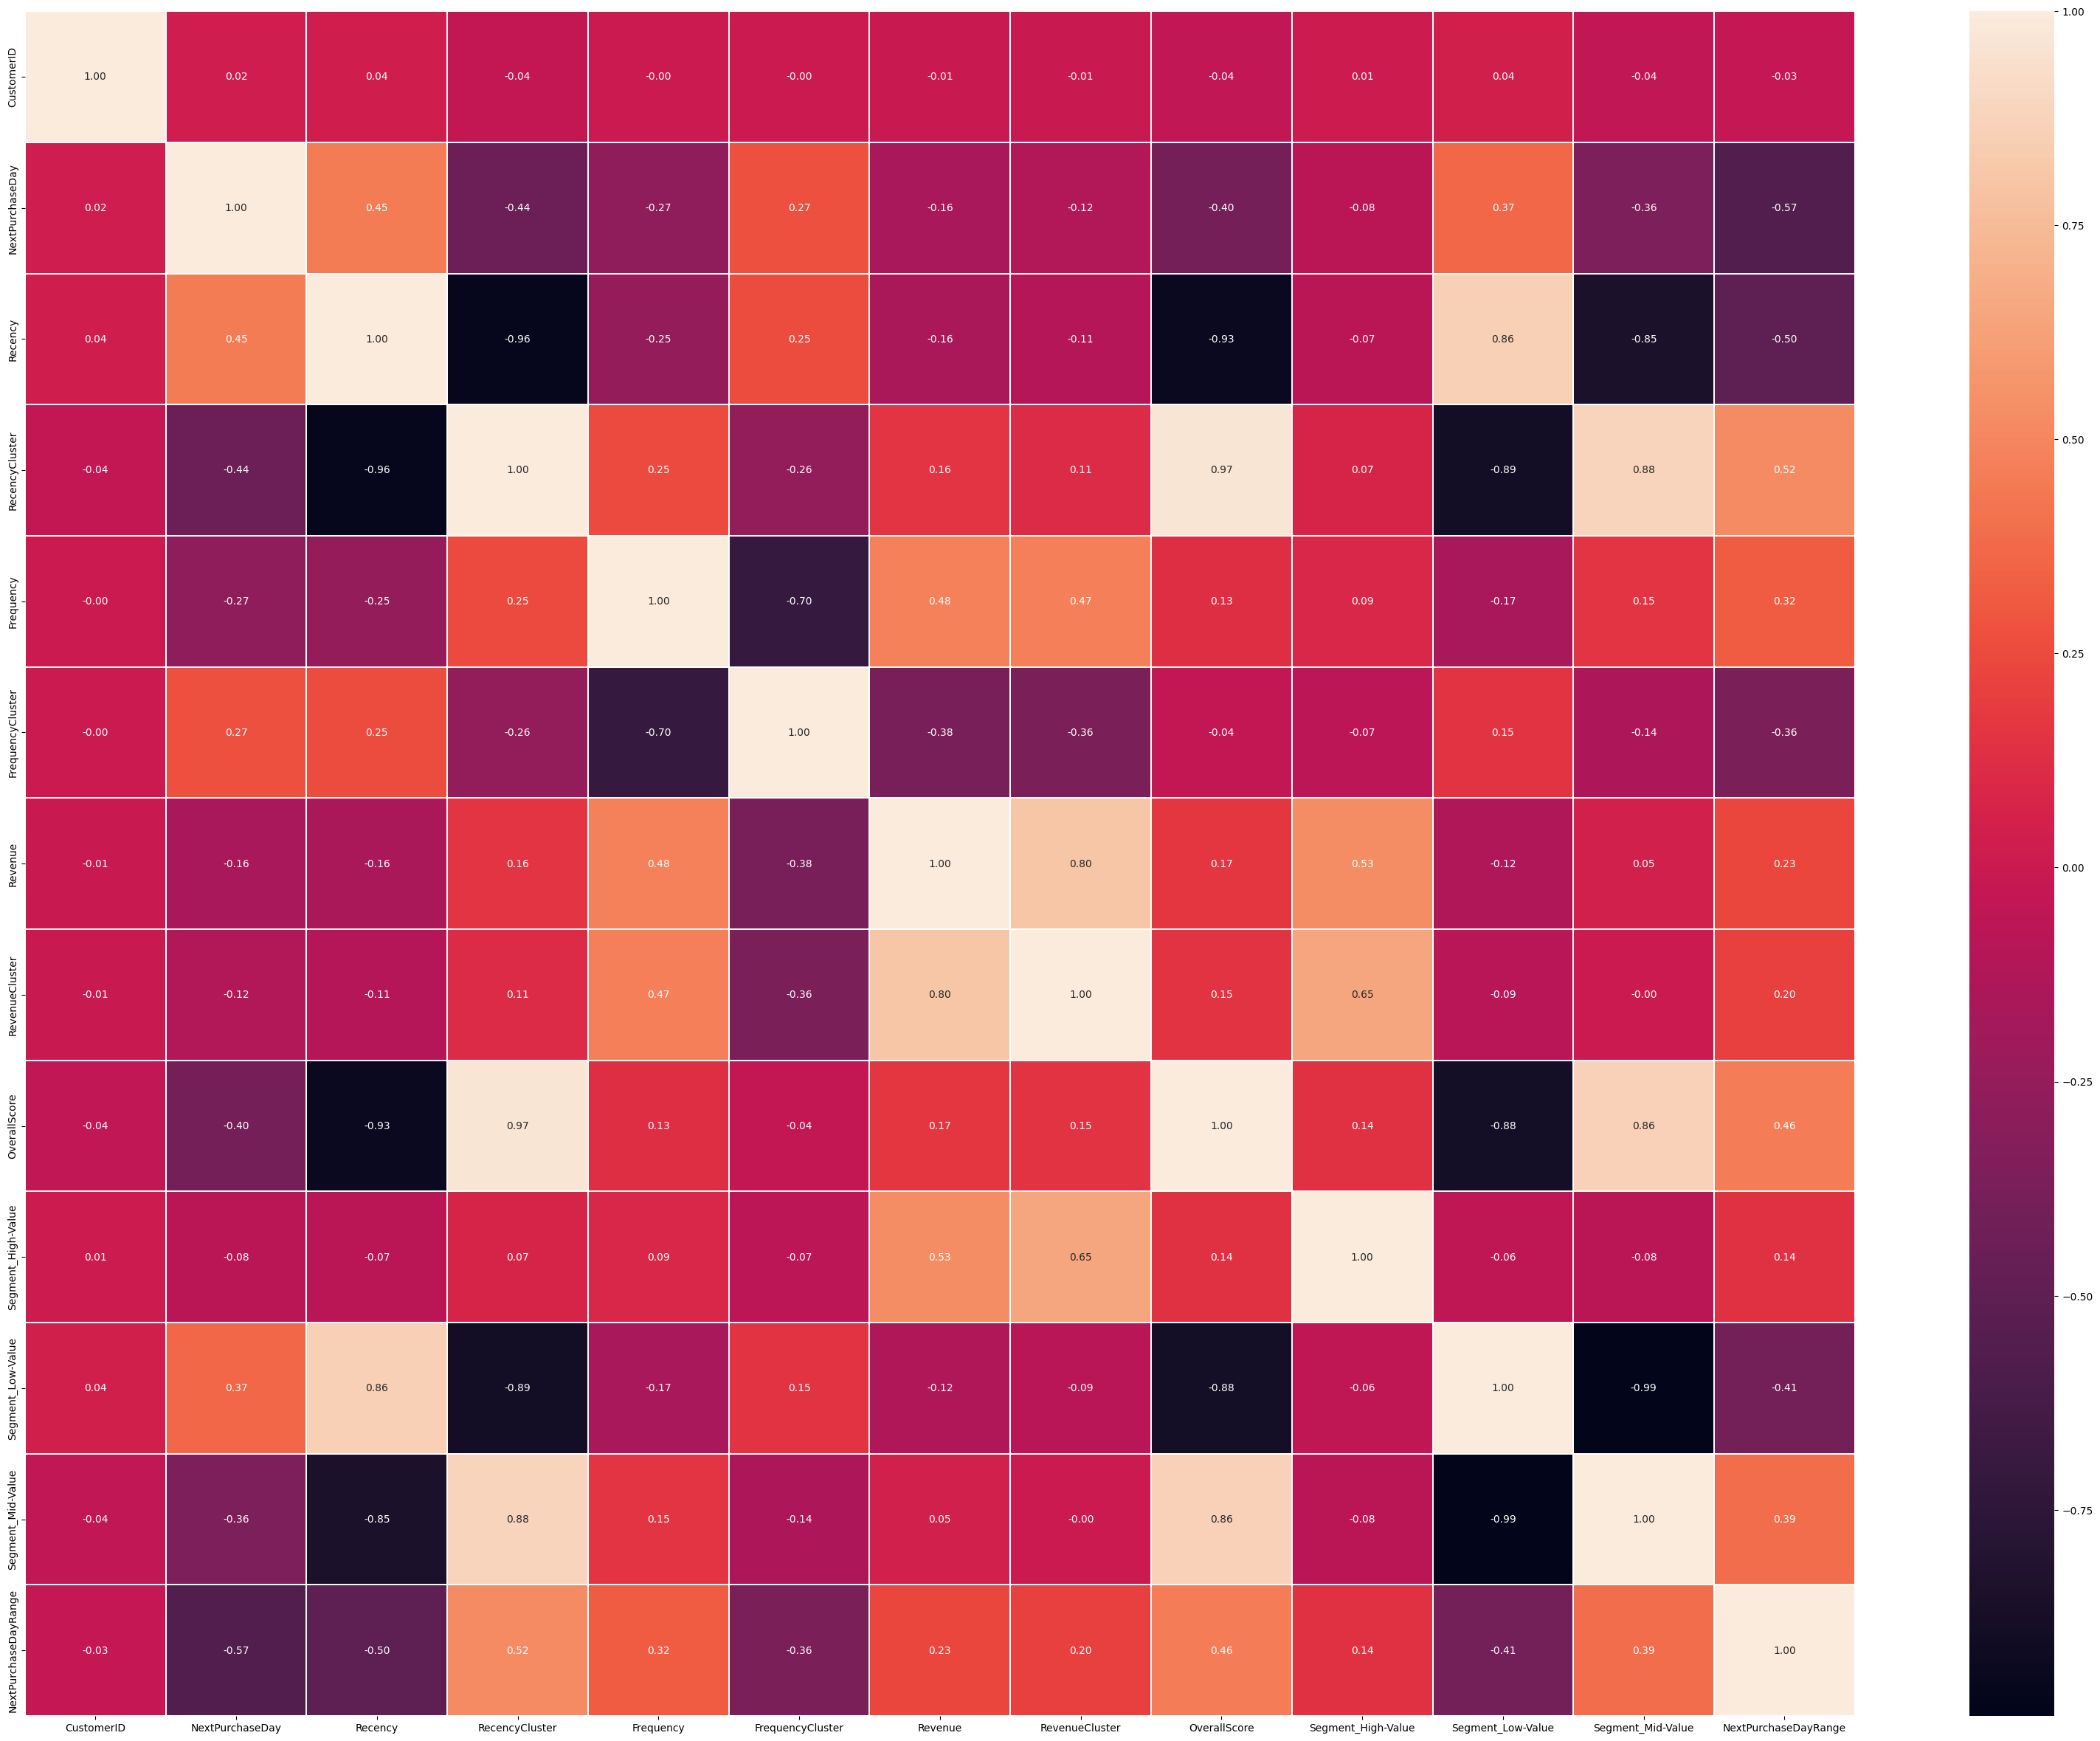

In [ ]:
plt.figure(figsize = (40, 30))
sns.heatmap(corr_matrix, annot = True, linewidths=0.2, fmt=".2f");

## Building Machine Learning Models

In [ ]:
ctm_class = ctm_class.drop('NextPurchaseDay', axis=1)

In [ ]:
X, y = ctm_class.drop('NextPurchaseDayRange', axis=1), ctm_class.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)

In [ ]:
import time
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define the scorer with two metrics
scorer = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, pos_label=3, average='macro')
}

# Define the models
models = [
    ('LogisticRegression', LogisticRegression()),
    ('GaussianNB', GaussianNB()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('SVC', SVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# For each model name and model in models
for model_name, model in models:
    model_scores_dict = {}


    # Add model_name to model_scores_dict
    model_scores_dict[model_name] = {}

    # Define the KFold object
    kfold = KFold(n_splits=2, random_state=24, shuffle=True)

    # Perform cross-validation using the scorer
    start = time.time()
    cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scorer)
    end = time.time()

    # Store the results for each metric in model_scores_dict
    model_scores_dict[model_name]['fit_time'] = cv_results['fit_time']
    model_scores_dict[model_name]['score_time'] = cv_results['score_time']
    model_scores_dict[model_name]['test_accuracy'] = cv_results['test_accuracy']
    model_scores_dict[model_name]['test_f1_score'] = cv_results['test_f1_score']
    model_scores_dict[model_name]['mean_fit_time'] = cv_results['fit_time'].mean()
    model_scores_dict[model_name]['mean_score_time'] = cv_results['score_time'].mean()
    model_scores_dict[model_name]['mean_test_accuracy'] = cv_results['test_accuracy'].mean()
    model_scores_dict[model_name]['mean_test_f1_score'] = cv_results['test_f1_score'].mean()
    model_scores_dict[model_name]['total_time'] = end - start

    # Print the model name and its total time
    print(f"{model_name} - Total time: {end - start:.2f}s")


LogisticRegression - Total time: 0.19s
GaussianNB - Total time: 0.08s
RandomForestClassifier - Total time: 0.83s
SVC - Total time: 0.36s
DecisionTreeClassifier - Total time: 0.03s
KNeighborsClassifier - Total time: 0.16s


Tried to improve the existing model XGB by finding suitable parameters via the process of hyperparameter tuning using GridSearchCV. We will check if the improved XGB Classifier model outperforms the LOGISTIC REGRESSION model.

In [ ]:
#!pip install joblib==1.1.1 imbalanced-learn


In [ ]:
#!pip install scikit-learn==1.0.1


In [ ]:
#import os
#os.kill(os.getpid(), 9)


In [ ]:
from sklearn.model_selection import GridSearchCV

parameter = {
    'max_depth':range(3,10,2), 
    'min_child_weight':range(1,5,2)
    }

p_grid_search = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric='mlogloss'), 
                             param_grid = parameter, 
                             scoring='accuracy', 
                             n_jobs=-1, 
                             #iid=False, 
                             cv=2
                            )

p_grid_search.fit(X_train, y_train)


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 5, 2)},
             scoring='accuracy')

In [ ]:
# Print the GridSearchCV object to see the output
print(p_grid_search)

# Print the best estimator returned by GridSearchCV
print(p_grid_search.best_estimator_)

# Print the best parameters returned by GridSearchCV
print(p_grid_search.best_params_)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=

In [ ]:
p_grid_search.best_params_, p_grid_search.best_score_


({'max_depth': 3, 'min_child_weight': 3}, 0.8986136904432516)

In [ ]:
refined_xgb_model = xgb.XGBClassifier(eval_metric='logloss', 
                                      max_depth=list(p_grid_search.best_params_.values())[0]-1, 
                                      min_child_weight=list(p_grid_search.best_params_.values())[-1]+4
                                     ).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(refined_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(refined_xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.93
Accuracy of XGB classifier on test set: 0.90


In [ ]:
ref_xgb_pred_y = refined_xgb_model.predict(X_test)

In [ ]:
log_reg_pred_y = LogisticRegression().fit(X_train, y_train).predict(X_test)

In [ ]:
def get_confusion_matrix(y_test, y_pred):
    """
    Displays the confusion matrix of the input numpy arrays y_test and y_pred.
    
    INPUT: 
        y_test - A numpy array 
        y_pred - A numpy array
        
    OUTPUT:
        NoneType
    """
    
    data = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    conf_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], 
                              rownames=['Actual'], 
                              colnames=['Predicted'])
    
    sns.heatmap(conf_matrix, annot=True, fmt = "d", cmap="Spectral")
    plt.show()

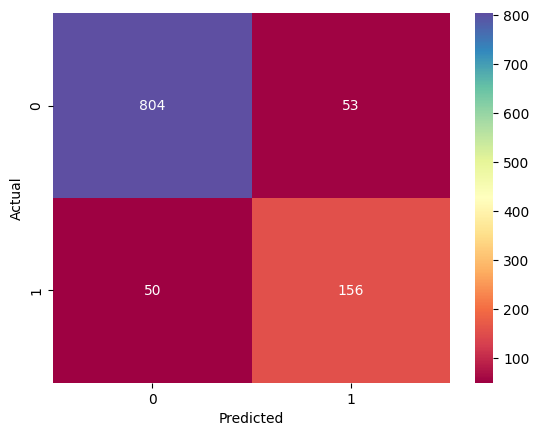

In [ ]:
get_confusion_matrix(np.array(y_test), ref_xgb_pred_y)

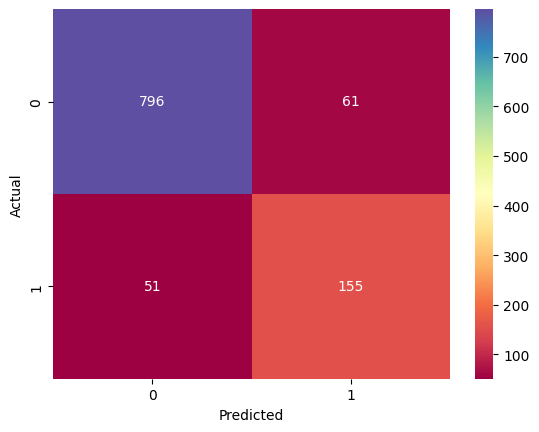

In [ ]:
get_confusion_matrix(np.array(y_test), log_reg_pred_y)

In [ ]:

ref_xgb_log_reg_dict = {"model_name" : ["xgb.XGBClassifier", "LogisticRegression"], 
                        "accuracy"   : [accuracy_score(y_test, ref_xgb_pred_y), accuracy_score(y_test, log_reg_pred_y)], 
                        "f1_score"   : [f1_score(y_test, ref_xgb_pred_y), f1_score(y_test, log_reg_pred_y)], 
                        "recall"     : [recall_score(y_test, ref_xgb_pred_y), recall_score(y_test, log_reg_pred_y)], 
                        "precision"  : [precision_score(y_test, ref_xgb_pred_y), precision_score(y_test, log_reg_pred_y)]
                       }

# Create a dataframe with ref_xgb_log_reg_dict
ref_xgb_log_reg_df = pd.DataFrame(ref_xgb_log_reg_dict).set_index("model_name")

# Order the dataframe ref_xgb_log_reg_df by the metric values in increasing order
ref_xgb_log_reg_df.sort_values(by=["accuracy", "f1_score", "recall", "precision"], ascending=False)


,accuracy,f1_score,recall,precision
model_name,,,,
xgb.XGBClassifier,0.903104,0.751807,0.757282,0.746411
LogisticRegression,0.894638,0.734597,0.752427,0.717593
